In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples
import glob

#import another python file we created

In [14]:
type_1 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]
type_2 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "None", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [15]:
#For the first type water is the largest with 803 files
train_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/train"
test_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/test"

#For the second type none is the largest with 3,649 files
train_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/train"
test_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/test"

In [16]:
train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=type_1, batch_size=50, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=type_1, batch_size=10, shuffle=False)

train_batch2 = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type2, target_size=(64, 64), classes=type_2, batch_size=50, shuffle=True)
test_batch2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type2, target_size=(64, 64), classes=type_2, batch_size=10, shuffle=False)

Found 5332 images belonging to 18 classes.
Found 1475 images belonging to 18 classes.
Found 6798 images belonging to 19 classes.
Found 6783 images belonging to 19 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

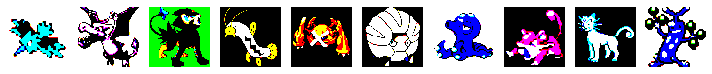

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

In [17]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

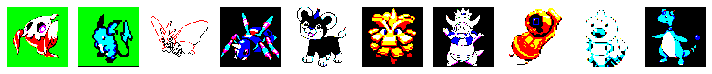

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [18]:
#visualize data (function is from tensorflow's website)
imgs2, labels2 = next(train_batch2)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs2)
print(labels2)

In [149]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (4, 4), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (4,4), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = (4,4), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (4,4), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (4,4), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Flatten(),
    Dense(units = 18, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?

In [150]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 64, 64, 32)        1568      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 31, 31, 64)        32832     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 15, 15, 128)     

In [151]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [152]:
model.fit(x=train_batch, steps_per_epoch = 50, epochs=40, verbose=1)

Epoch 1/40
50/50 [==============================] - 30s 585ms/step - loss: 18.6918 - accuracy: 0.0921 - mean_squared_error: 0.0832
Epoch 2/40
50/50 [==============================] - 29s 584ms/step - loss: 3.0424 - accuracy: 0.1553 - mean_squared_error: 0.0537
Epoch 3/40
50/50 [==============================] - 29s 590ms/step - loss: 2.7250 - accuracy: 0.1834 - mean_squared_error: 0.0516
Epoch 4/40
50/50 [==============================] - 29s 587ms/step - loss: 2.5833 - accuracy: 0.1904 - mean_squared_error: 0.0503
Epoch 5/40
50/50 [==============================] - 29s 589ms/step - loss: 2.5321 - accuracy: 0.2113 - mean_squared_error: 0.0500
Epoch 6/40
50/50 [==============================] - 29s 588ms/step - loss: 2.4387 - accuracy: 0.2446 - mean_squared_error: 0.0487
Epoch 7/40
50/50 [==============================] - 29s 585ms/step - loss: 2.3177 - accuracy: 0.2783 - mean_squared_error: 0.0472
Epoch 8/40
50/50 [==============================] - 28s 558ms/step - loss: 2.2904 - accur

In [157]:
model2 = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Flatten(),
    Dense(units = 19, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?

In [158]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 15, 15, 128)     

In [159]:
model2.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [160]:
model2.fit(x=train_batch2, steps_per_epoch = 50, epochs=25, verbose=1)

Epoch 1/25
50/50 [==============================] - 19s 364ms/step - loss: 19.7148 - accuracy: 0.3017 - mean_squared_error: 0.0670
Epoch 2/25
50/50 [==============================] - 18s 365ms/step - loss: 3.6665 - accuracy: 0.3718 - mean_squared_error: 0.0500
Epoch 3/25
50/50 [==============================] - 18s 366ms/step - loss: 2.6223 - accuracy: 0.4069 - mean_squared_error: 0.0447
Epoch 4/25
50/50 [==============================] - 18s 369ms/step - loss: 2.0752 - accuracy: 0.4968 - mean_squared_error: 0.0381
Epoch 5/25
50/50 [==============================] - 18s 363ms/step - loss: 2.0683 - accuracy: 0.4869 - mean_squared_error: 0.0392
Epoch 6/25
50/50 [==============================] - 18s 369ms/step - loss: 2.0585 - accuracy: 0.4774 - mean_squared_error: 0.0393
Epoch 7/25
50/50 [==============================] - 19s 370ms/step - loss: 1.8476 - accuracy: 0.5426 - mean_squared_error: 0.0360
Epoch 8/25
50/50 [==============================] - 18s 369ms/step - loss: 1.9011 - accur

In [161]:
output = model.predict(test_batch)
output

array([[4.8393641e-02, 1.7569015e-03, 6.6742767e-04, ..., 1.6902823e-02,
        2.7256445e-03, 3.4729254e-03],
       [3.8341674e-01, 5.8171716e-02, 2.3133585e-02, ..., 5.1497098e-02,
        5.2027516e-02, 3.4298070e-02],
       [6.1477166e-02, 2.7489074e-04, 3.0936305e-03, ..., 4.3549076e-02,
        5.4543656e-01, 7.1781017e-02],
       ...,
       [7.6448126e-03, 4.6632681e-03, 2.6420837e-03, ..., 3.9449352e-01,
        1.5781151e-02, 3.2558912e-01],
       [1.0323852e-01, 2.6522860e-02, 1.4799933e-01, ..., 3.2626826e-02,
        7.6587917e-03, 1.0394197e-01],
       [8.1760157e-03, 1.1911244e-03, 5.1500904e-03, ..., 1.1242880e-02,
        3.4545170e-05, 4.8118666e-02]], dtype=float32)

In [162]:
output2 = model2.predict(test_batch2)
output2

array([[0.07266118, 0.09016103, 0.08340281, ..., 0.03587515, 0.10217497,
        0.02746963],
       [0.08694693, 0.10091228, 0.08578482, ..., 0.03014773, 0.06984581,
        0.02220702],
       [0.05660711, 0.07889206, 0.06157309, ..., 0.05700811, 0.07673867,
        0.03089972],
       ...,
       [0.01457689, 0.07037169, 0.02772828, ..., 0.02596574, 0.02302279,
        0.16053158],
       [0.00864971, 0.05722784, 0.04650929, ..., 0.0489655 , 0.027761  ,
        0.18423685],
       [0.02932575, 0.09770489, 0.06672814, ..., 0.05701414, 0.04890225,
        0.0738066 ]], dtype=float32)

In [163]:
prediction = []
prediction2 = []

In [164]:
def getType(pokemon):
    return np.argmax(pokemon)

In [165]:
for x in range(0,len(output)):
    prediction.append(getType(output[x]))
    
for x in range(0, len(output2)):
    prediction2.append(getType(output2[x]))

In [166]:
def test_accuracy(prediction, real):
    correct = 0
    if len(prediction) != len(real):
        print("Error")
        return 0
    for x in range(0, len(prediction)):
        if prediction[x] == real[x]:
            correct += 1
    print(100 * (correct / len(prediction)))

print("Type 1 accuracy:")
test_accuracy(prediction,test_batch.labels)
print("Type 2 accuracy:")
test_accuracy(prediction2,test_batch2.labels)

Type 1 accuracy:
54.779661016949156
Type 2 accuracy:
52.88220551378446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

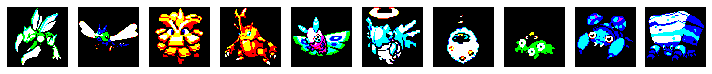

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
imgs, labels = next(test_batch)
plotImages(imgs)
print(labels)

In [12]:
test_batch.filenames

['Bug\\black-white-123.png',
 'Bug\\black-white-193.png',
 'Bug\\black-white-204.png',
 'Bug\\black-white-214.png',
 'Bug\\black-white-269.png',
 'Bug\\black-white-292.png',
 'Bug\\black-white-412-sandy.png',
 'Bug\\black-white-413.png',
 'Bug\\black-white-46.png',
 'Bug\\black-white-558.png',
 'Bug\\black-white-588.png',
 'Bug\\black-white-589.png',
 'Bug\\black-white-596.png',
 'Bug\\black-white-616.png',
 'Bug\\conquest-212.png',
 'Bug\\conquest-541.png',
 'Bug\\conquest-637.png',
 'Bug\\crystal-123.png',
 'Bug\\crystal-14.png',
 'Bug\\crystal-214.png',
 'Bug\\crystal-46.png',
 'Bug\\crystal-48.png',
 'Bug\\diamond-pearl-11.png',
 'Bug\\diamond-pearl-127.png',
 'Bug\\diamond-pearl-13.png',
 'Bug\\diamond-pearl-14.png',
 'Bug\\diamond-pearl-291.png',
 'Bug\\diamond-pearl-292.png',
 'Bug\\diamond-pearl-413-sandy.png',
 'Bug\\diamond-pearl-413-trash.png',
 'Bug\\diamond-pearl-414.png',
 'Bug\\diamond-pearl-46.png',
 'Bug\\emerald-166.png',
 'Bug\\emerald-193.png',
 'Bug\\emerald-204.pn

In [167]:
test_batch2.filenames

['Bug\\black-white-347.png',
 'Bug\\black-white-348.png',
 'Bug\\black-white-451.png',
 'Bug\\conquest-347.png',
 'Bug\\conquest-348.png',
 'Bug\\conquest-451.png',
 'Bug\\diamond-pearl-347.png',
 'Bug\\diamond-pearl-348.png',
 'Bug\\diamond-pearl-451.png',
 'Bug\\emerald-347.png',
 'Bug\\emerald-348.png',
 'Bug\\global-link-347.png',
 'Bug\\global-link-348.png',
 'Bug\\global-link-451.png',
 'Bug\\heartgold-soulsilver-347.png',
 'Bug\\heartgold-soulsilver-348.png',
 'Bug\\heartgold-soulsilver-451.png',
 'Bug\\icons-347.png',
 'Bug\\icons-348.png',
 'Bug\\icons-451.png',
 'Bug\\platinum-347.png',
 'Bug\\platinum-348.png',
 'Bug\\platinum-451.png',
 'Bug\\ruby-sapphire-347.png',
 'Bug\\ruby-sapphire-348.png',
 'Dark\\black-white-130.png',
 'Dark\\black-white-248.png',
 'Dark\\black-white-274.png',
 'Dark\\black-white-275.png',
 'Dark\\black-white-318.png',
 'Dark\\black-white-319.png',
 'Dark\\black-white-332.png',
 'Dark\\black-white-342.png',
 'Dark\\black-white-434.png',
 'Dark\\blac